## Problem Statement

An X Education requires to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. A ballpark of the target lead conversion rate should be around 80%.

## Goals

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

##  Importing Libraries and Data

In [1]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset to csv

leads_df=pd.read_csv("Leads.csv")

## Inspecting Dataframe

In [3]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [5]:
# Statstical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observations :

Here, we can see there are few categorical values for which we have to create dummy variables.
Also, presence of null values can be observed thus, we have to treat them accordingly in further steps

In [7]:
# Check the percentage of missing values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Observations :

As we can see there are a lot of columnw which have high number of missing values. Clearly, these columns are not useful. We can remove the columns which has more than 30% missing values.

## Data Cleaning and Preparation

### Handing Missing Values

Dropping columns which has more 30% missing Values

In [8]:
leads_df = leads_df.replace({'':np.nan})
leads_df = leads_df.dropna(thresh=0.7*len(leads_df), axis=1)

In [9]:
# Check the percentage of missing values in each column again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

### Observations:
- Now we have removed columns having more than 30% null values.
- The variable 'City' & 'Country' won't be of any use in our analysis. So we can drop them.

In [10]:
leads_df.drop(['City'], axis = 1, inplace = True)

In [11]:
leads_df.drop(['Country'], axis = 1, inplace = True)

In [12]:
# Check the percentage of missing values in each column again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

### Handling 'Select'  Values

There are a few columns in which there is a level called 'Select' which means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [13]:
# Get the value counts of all the columns
for col in leads_df:    
    print(leads_df[col].astype('category').value_counts())
    print('_'*50)

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
__________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
__________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
____________________

### Observations :

- As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'.
- These values are as good as missing values and hence we will convert 'Select' values to Nan.

### Hanlding Select Values

In [14]:
# Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [15]:
# Check the percentage of missing values in each column again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

### Observations:
- As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

In [16]:
# Dropping Columns with Missing Values >=40%
leads_df = leads_df.dropna(thresh=0.6*len(leads_df), axis=1)

In [17]:
# Check the percentage of missing values in each column again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

### Handling Imbalanced Variables

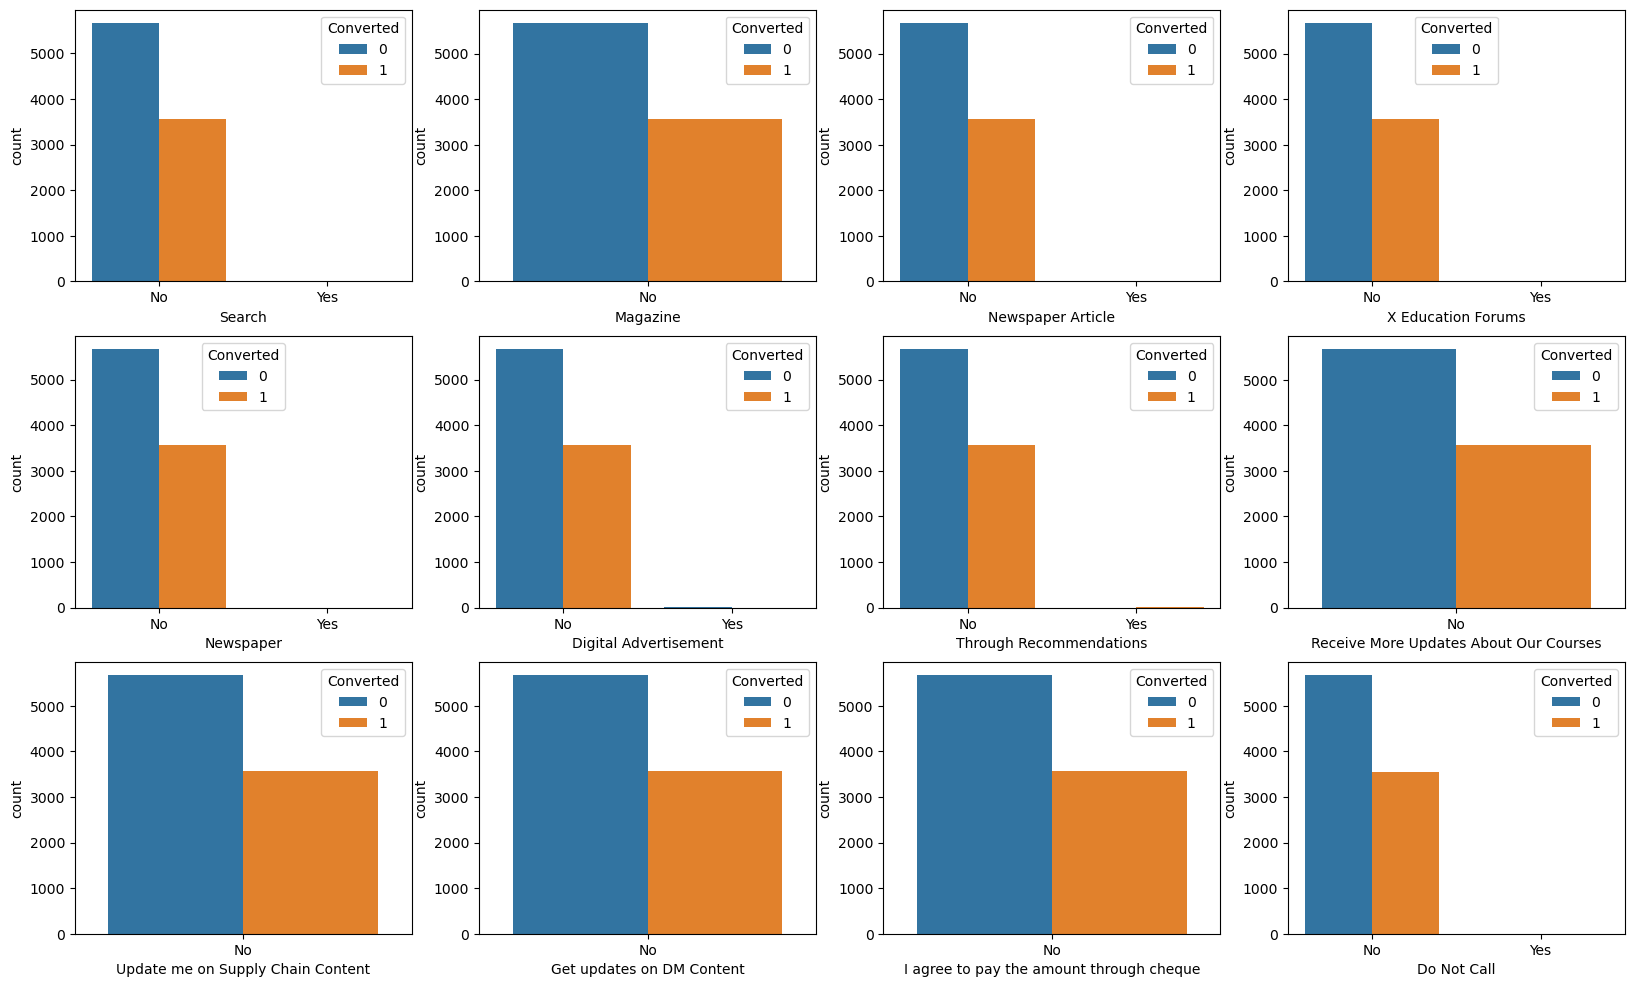

In [18]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3])
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[2,3])
plt.show()

### Observations :
- For all these columns data is highly imbalanced, majorly only one type of values is present in them, thus we will drop them

In [19]:
leads_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

### Analysing Other columns

In [20]:
# Column : 'What matters most to you in choosing a course'
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### Observations :
- The column 'What matters most to you in choosing a course' has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we can drop this column as well.

In [21]:
leads_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [22]:
# Check the percentage of missing values in each column again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

Specialization                            36.58
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [23]:
# Column : 'What is your current occupation'
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Observations :

- This column has lot of null values, but it also looks important for analysis.
- We can impute the missing data in the 'What is your current occupation' column with 'Unknown'

In [24]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Unkown')

In [25]:
# Column : 'TotalVisits'
leads_df['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

### Observations :
Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [26]:
# Drop the null value rows in the column 'TotalVisits'

leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]

In [27]:
# Column : 'Lead Source'
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

### Observations :
- Google is having highest number of occurences, hence we will impute the missing values with label 'Google'
- We can combine low frequency values to Others

In [28]:
# Replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

# 'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')


In [29]:
# Combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')


In [30]:
# Column : 'Specialization'
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3304
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
# Creating a separate category called 'Others' for the missing values 
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

In [32]:
# Check the percentage of missing values in each column again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Observations

- All the columns have been cleaned.
- Let's check the dataset again.

In [33]:
leads_df.shape

(9103, 14)

In [34]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [35]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


### Observations :
The variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables.

In [36]:
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [37]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [38]:
leads_df.shape

(9103, 12)

In [39]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

## Target Variable 

- Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
- Visualizing Distribution of 'Converted' Variable

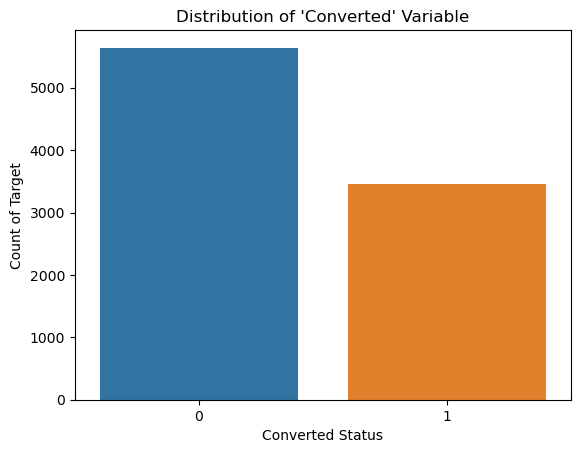

In [40]:
sns.countplot(leads_df.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [41]:
# Finding out conversion rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.02043282434362

### Observations :

- Currently lead Conversion rate is 38% only

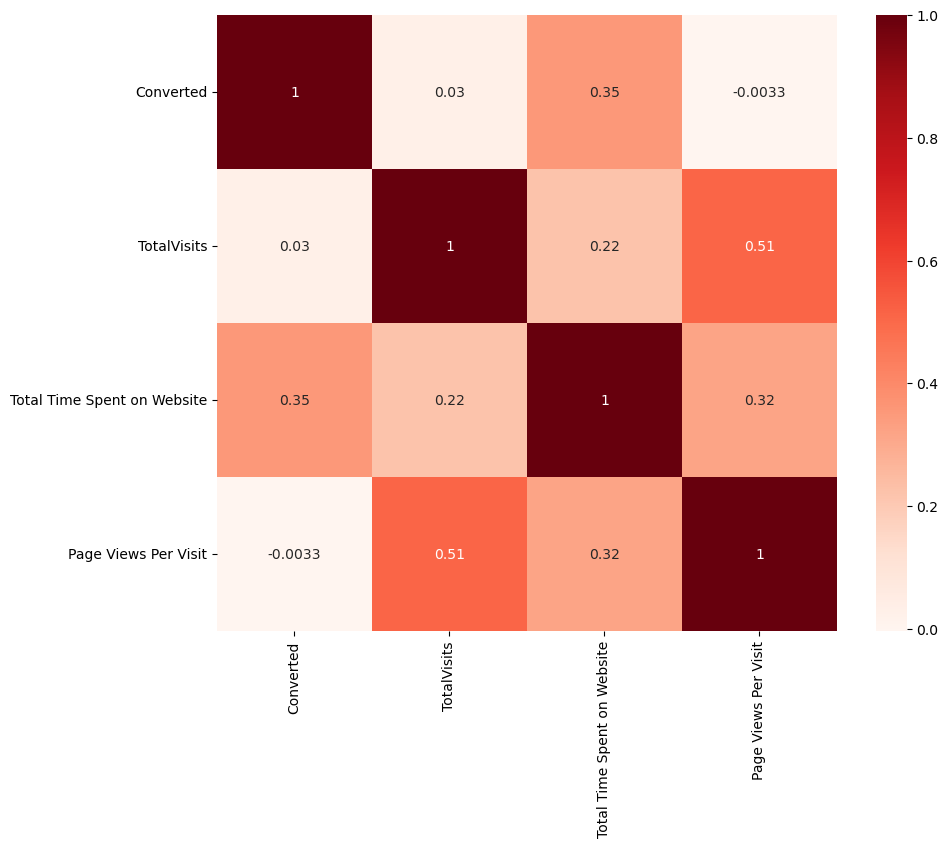

In [42]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_df.corr(), cmap="Reds", annot=True)
plt.show()

### Variable : 'TotalVisits'

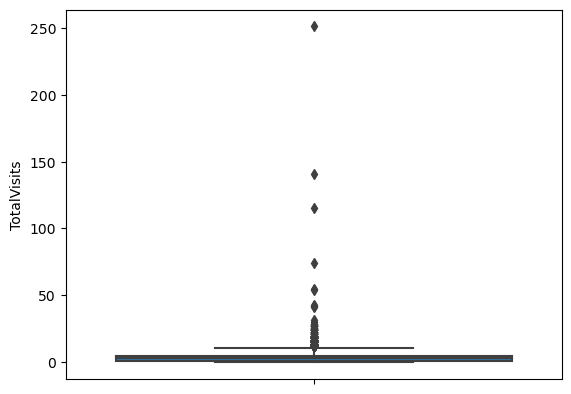

In [43]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

### Observations :
- Outliers detected

In [44]:
#checking percentile values for "Total Visits"

leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

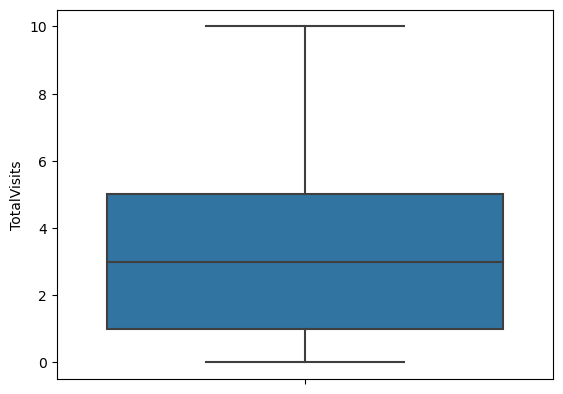

In [45]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

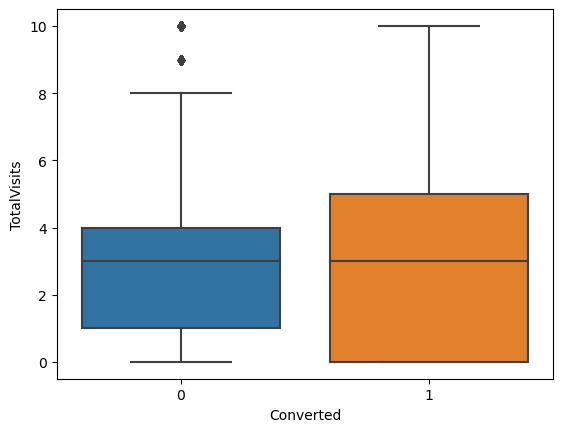

In [46]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

### Observations :
- As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

### Variable : 'Total time spent on website'

In [47]:
#checking percentiles for "Total Time Spent on Website"

leads_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

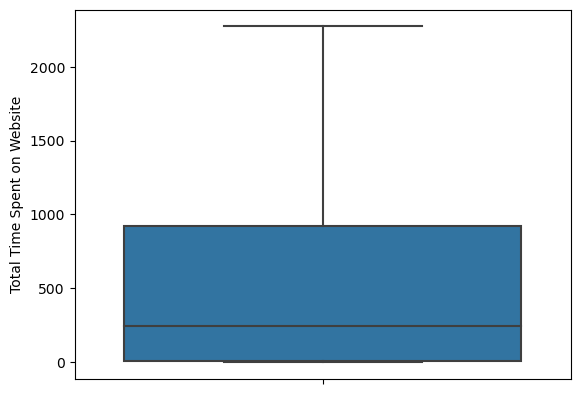

In [48]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads_df['Total Time Spent on Website'])
plt.show()

### Observations :

- No Outlier Detected

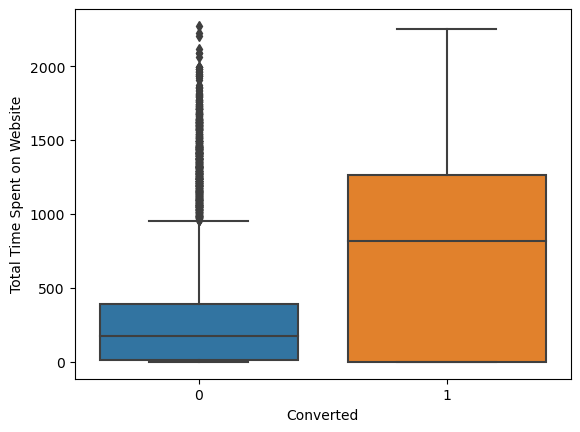

In [49]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

### Observations :

- Leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

### Variable : 'Page views per visit'

In [50]:
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

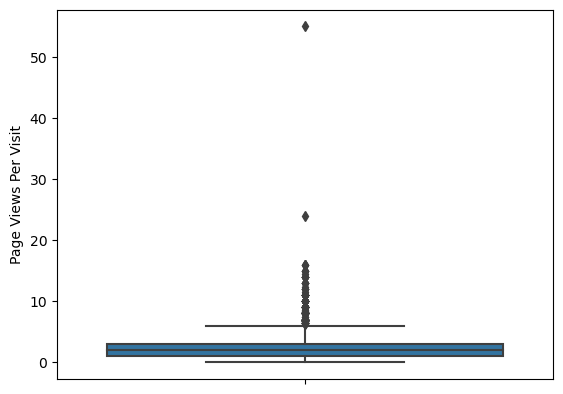

In [51]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads_df['Page Views Per Visit'])
plt.show()

### Observations :
 - Outlier Detected


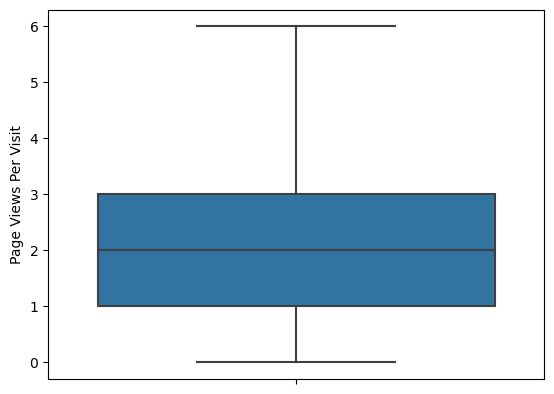

In [52]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

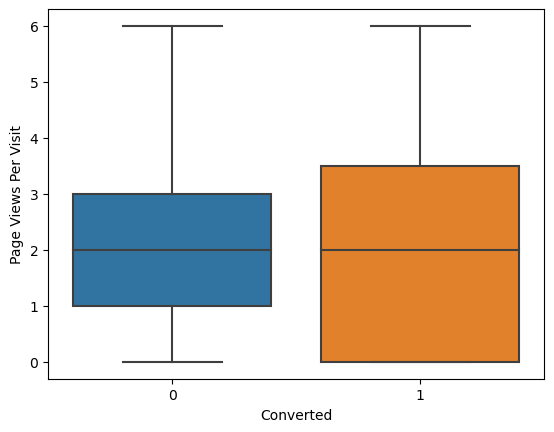

In [53]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

### Observations :
- Median for converted and not converted leads is almost same.
- Nothing conclusive can be said on the basis of Page Views Per Visit.

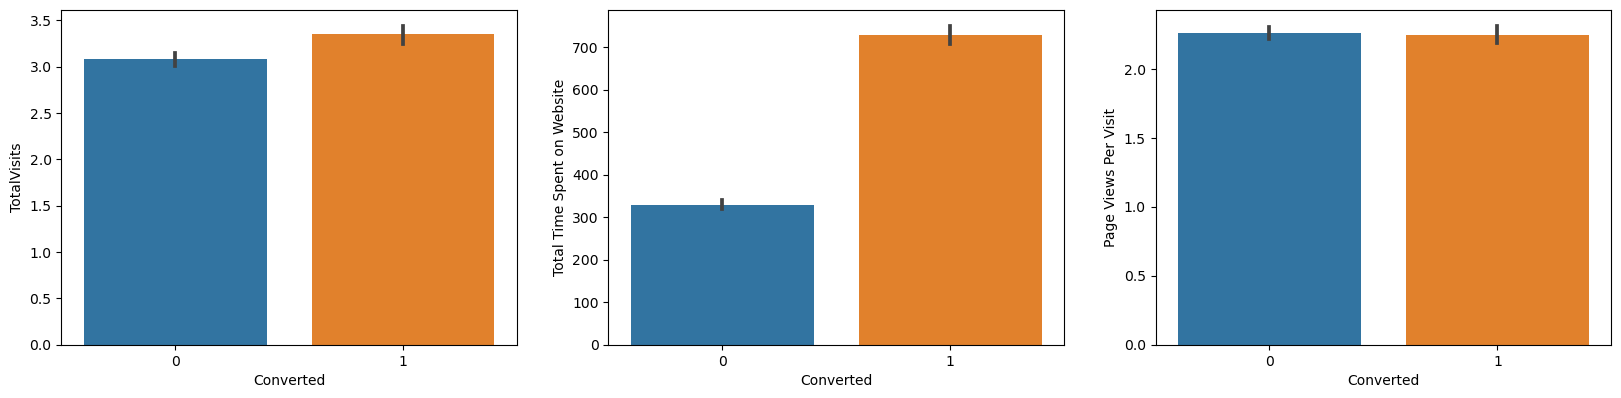

In [54]:
# Now checking the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = leads_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = leads_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = leads_df)
plt.show()

### Observations :
- The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Dummy Variable Creation

The next step is to deal with the categorical variables present in the dataset. So we will which variables are categorical variables

In [55]:
cat_cols= leads_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [57]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization')

leads_df = pd.concat([leads_df, dummy_spl], axis = 1)

In [58]:
# Drop the variables for which the dummy variables have been created

leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [59]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## Test Train Split

In [60]:
# Import the required library

from sklearn.model_selection import train_test_split

In [61]:
# Putting all the feature variables in X

X = leads_df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
# Putting the target variable in y

y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

- There are a few numeric variables present in the dataset which have different scales.
- Scaling these variables now.

In [64]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [65]:
# Scalling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7962,0.3,0.570794,0.250000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5520,0.7,0.026631,1.000000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1962,0.5,0.075011,0.416667,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1566,1.0,0.550821,0.583333,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9170,0.0,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Checkig Coorelations

In [66]:
leads_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.046728,0.354939,-0.003800,-0.040698,0.306224,-0.010824,-0.010824,0.033821,-0.125395,...,-0.008079,0.066812,0.011059,0.044595,-0.158220,-0.008729,0.008234,-0.014398,0.019467,-0.008912
TotalVisits,0.046728,1.000000,0.363183,0.767588,0.456351,-0.283085,-0.061444,-0.058732,0.210936,-0.501650,...,0.063092,0.050389,0.072455,0.050447,-0.404490,0.045393,0.042383,0.027897,0.064242,0.100069
Total Time Spent on Website,0.354939,0.363183,1.000000,0.366835,0.294515,-0.194106,-0.051363,-0.050020,0.210321,-0.376633,...,0.023475,0.068576,0.043585,0.062277,-0.297863,0.029044,0.021989,0.003712,0.051439,0.043746
Page Views Per Visit,-0.003800,0.767588,0.366835,1.000000,0.555938,-0.315623,-0.067358,-0.063150,0.255431,-0.575653,...,0.080902,0.069160,0.076287,0.063762,-0.462154,0.046854,0.030143,0.021128,0.074847,0.116866
Lead Origin_Landing Page Submission,-0.040698,0.456351,0.294515,0.555938,1.000000,-0.287969,-0.062922,-0.059141,0.074392,-0.525681,...,0.096847,0.132617,0.101068,0.125340,-0.755222,0.076775,0.056360,0.048396,0.127060,0.111537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.008729,0.045393,0.029044,0.046854,0.076775,-0.019752,-0.006161,-0.006161,0.013842,-0.043452,...,-0.014798,-0.033249,-0.015877,-0.025408,-0.079552,1.000000,-0.009476,-0.007002,-0.020949,-0.015877
Specialization_Rural and Agribusiness,0.008234,0.042383,0.021989,0.030143,0.056360,-0.014187,-0.005256,-0.005256,-0.029792,-0.034540,...,-0.012625,-0.028366,-0.013545,-0.021676,-0.067867,-0.009476,1.000000,-0.005973,-0.017872,-0.013545
Specialization_Services Excellence,-0.014398,0.027897,0.003712,0.021128,0.048396,-0.011121,-0.003884,-0.003884,-0.027628,-0.028233,...,-0.009328,-0.020959,-0.010008,-0.016016,-0.050146,-0.007002,-0.005973,1.000000,-0.013205,-0.010008
Specialization_Supply Chain Management,0.019467,0.064242,0.051439,0.074847,0.127060,-0.025565,-0.001758,-0.001758,-0.026263,-0.073764,...,-0.027910,-0.062710,-0.029944,-0.047920,-0.150039,-0.020949,-0.017872,-0.013205,1.000000,-0.029944


## Model Building

In [67]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.8232893910860013
Testing Accuracy
0.486268766019773
[[ 353 1336]
 [  67  975]]
              precision    recall  f1-score   support

           0       0.84      0.21      0.33      1689
           1       0.42      0.94      0.58      1042

    accuracy                           0.49      2731
   macro avg       0.63      0.57      0.46      2731
weighted avg       0.68      0.49      0.43      2731



In [68]:
logreg.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.03526642, 0.96473358],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [69]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
# Take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 3),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Email Received', False, 4),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True,

In [71]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Unkown',
       'What is your current occupation_Working Professional',
       'Last Notable Ac

Here we can see the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [72]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

In [74]:
# Import statsmodels

import statsmodels.api as sm

### Model 1

In [75]:
# Fitting a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.4
Date:                Mon, 16 Oct 2023   Deviance:                       5002.7
Time:                        22:20:49   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4188
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5591      0.595      0.940      0.347      -0.607       1.725
TotalVisits                                              1.2511      0.200      6.269      0.000       0.860       1.642
Total Time Spent on Website                              4.4919      0.171     26.311      0.000       4.157       4.826
Page Views Per Visit                                    -1.1212      0.207     -5.414      0.000      -1.527      -0.715
Lead Origin_Landing Page Submission                     -0.8183      0.130     -6.303      0.000      -1.073      -0.564
Lead Origin_Lead Add Form                                3.2107      0.252     12.719      0.000       2.716       3.705
Lead Origin_Lead Import                                  0.6717      0.468      1.434      0.152      -0.246       1.590
Lead Source_Olark Chat                                   1.0415      0.146      7.112      0.000       0.754       1.329
Lead Source_Social Media                                 1.7812      1.537      1.159      0.246      -1.231       4.793
Lead Source_Welingak Website                             2.2856      0.756      3.023      0.003       0.804       3.768
Do Not Email_Yes                                        -1.4227      0.197     -7.224      0.000      -1.809      -1.037
Last Activity_Converted to Lead                         -1.3744      0.230     -5.986      0.000      -1.824      -0.924
Last Activity_Email Bounced                             -1.2938      0.376     -3.444      0.001      -2.030      -0.557
Last Activity_Email Link Clicked                        -0.7731      0.389     -1.985      0.047      -1.536      -0.010
Last Activity_Form Submitted on Website                 -1.0247      0.343     -2.990      0.003      -1.696      -0.353
Last Activity_Had a Phone Conversation                   0.4657      0.852      0.547      0.585      -1.204       2.136
Last Activity_Olark Chat Conversation                   -1.6359      0.209     -7.814      0.000      -2.046      -1.226
Last Activity_Page Visited on Website                   -0.8023      0.229     -3.497      0.000      -1.252      -0.353
Last Activity_Resubscribed to emails                    11.5890   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_View in browser link Clicked              -1.5738      1.164     -1.353      0.176      -3.854       0.707
What is your current occupation_Housewife               22.7275   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -0.1705      0.620     -0.275      0.783      -1.385       1.044
What is your current occupation_Unemployed              -0

In [76]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,Last Notable Activity_Resubscribed to emails,inf
17,Last Activity_Resubscribed to emails,inf
21,What is your current occupation_Unemployed,15.21
22,What is your current occupation_Unkown,8.61
2,Page Views Per Visit,8.50
3,Lead Origin_Landing Page Submission,7.37
0,TotalVisits,6.41
34,Specialization_Others,4.69
27,Last Notable Activity_Modified,3.96
24,Last Notable Activity_Email Link Clicked,3.16


### Deleting the columns which has high p-valus & VIF

In [78]:
# Dropping column 'Last Activity_Resubscribed to emails' as it has high p-value
X_train.drop('Last Activity_Resubscribed to emails', axis = 1, inplace = True)

In [79]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.4
Date:                Mon, 16 Oct 2023   Deviance:                       5002.7
Time:                        22:20:50   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4188
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5591      0.595      0.940      0.347      -0.607       1.725
TotalVisits                                              1.2511      0.200      6.269      0.000       0.860       1.642
Total Time Spent on Website                              4.4919      0.171     26.311      0.000       4.157       4.826
Page Views Per Visit                                    -1.1212      0.207     -5.414      0.000      -1.527      -0.715
Lead Origin_Landing Page Submission                     -0.8183      0.130     -6.303      0.000      -1.073      -0.564
Lead Origin_Lead Add Form                                3.2107      0.252     12.719      0.000       2.716       3.705
Lead Origin_Lead Import                                  0.6717      0.468      1.434      0.152      -0.246       1.590
Lead Source_Olark Chat                                   1.0415      0.146      7.112      0.000       0.754       1.329
Lead Source_Social Media                                 1.7812      1.537      1.159      0.246      -1.231       4.793
Lead Source_Welingak Website                             2.2856      0.756      3.023      0.003       0.804       3.768
Do Not Email_Yes                                        -1.4227      0.197     -7.224      0.000      -1.809      -1.037
Last Activity_Converted to Lead                         -1.3744      0.230     -5.986      0.000      -1.824      -0.924
Last Activity_Email Bounced                             -1.2938      0.376     -3.444      0.001      -2.030      -0.557
Last Activity_Email Link Clicked                        -0.7731      0.389     -1.985      0.047      -1.536      -0.010
Last Activity_Form Submitted on Website                 -1.0247      0.343     -2.990      0.003      -1.696      -0.353
Last Activity_Had a Phone Conversation                   0.4657      0.852      0.547      0.585      -1.204       2.136
Last Activity_Olark Chat Conversation                   -1.6359      0.209     -7.814      0.000      -2.046      -1.226
Last Activity_Page Visited on Website                   -0.8023      0.229     -3.497      0.000      -1.252      -0.353
Last Activity_View in browser link Clicked              -1.5738      1.164     -1.353      0.176      -3.854       0.707
What is your current occupation_Housewife               22.7275   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -0.1705      0.620     -0.275      0.783      -1.385       1.044
What is your current occupation_Unemployed              -0.3378      0.575     -0.588      0.557      -1.464       0.788
What is your current occupation_Unkown                  -1

In [80]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,What is your current occupation_Unemployed,15.21
21,What is your current occupation_Unkown,8.61
2,Page Views Per Visit,8.50
3,Lead Origin_Landing Page Submission,7.37
0,TotalVisits,6.41
33,Specialization_Others,4.69
26,Last Notable Activity_Modified,3.96
23,Last Notable Activity_Email Link Clicked,3.16
6,Lead Source_Olark Chat,3.15
12,Last Activity_Email Link Clicked,3.15


In [81]:
# Dropping column 'What is your current occupation_Housewife' as it has high p-value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [82]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.5
Date:                Mon, 16 Oct 2023   Deviance:                       5010.9
Time:                        22:20:50   Pearson chi2:                 6.26e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4180
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2924      0.520      2.487      0.013       0.274       2.311
TotalVisits                                              1.2343      0.199      6.190      0.000       0.843       1.625
Total Time Spent on Website                              4.4890      0.171     26.314      0.000       4.155       4.823
Page Views Per Visit                                    -1.1220      0.207     -5.422      0.000      -1.528      -0.716
Lead Origin_Landing Page Submission                     -0.8045      0.130     -6.211      0.000      -1.058      -0.551
Lead Origin_Lead Add Form                                3.2098      0.252     12.720      0.000       2.715       3.704
Lead Origin_Lead Import                                  0.6705      0.468      1.432      0.152      -0.247       1.588
Lead Source_Olark Chat                                   1.0357      0.146      7.078      0.000       0.749       1.322
Lead Source_Social Media                                 1.7976      1.537      1.169      0.242      -1.215       4.811
Lead Source_Welingak Website                             2.2813      0.756      3.017      0.003       0.799       3.763
Do Not Email_Yes                                        -1.4276      0.197     -7.248      0.000      -1.814      -1.042
Last Activity_Converted to Lead                         -1.3806      0.229     -6.016      0.000      -1.830      -0.931
Last Activity_Email Bounced                             -1.2922      0.376     -3.441      0.001      -2.028      -0.556
Last Activity_Email Link Clicked                        -0.7749      0.389     -1.990      0.047      -1.538      -0.012
Last Activity_Form Submitted on Website                 -0.9718      0.335     -2.898      0.004      -1.629      -0.314
Last Activity_Had a Phone Conversation                   0.4637      0.852      0.544      0.586      -1.206       2.133
Last Activity_Olark Chat Conversation                   -1.6455      0.210     -7.847      0.000      -2.056      -1.234
Last Activity_Page Visited on Website                   -0.8277      0.230     -3.604      0.000      -1.278      -0.378
Last Activity_View in browser link Clicked              -1.5686      1.163     -1.349      0.177      -3.847       0.710
What is your current occupation_Student                 -0.9067      0.546     -1.661      0.097      -1.977       0.163
What is your current occupation_Unemployed              -1.0743      0.494     -2.175      0.030      -2.043      -0.106
What is your current occupation_Unkown                  -2.1689      0.499     -4.345      0.000      -3.147      -1.190
What is your current occupation_Working Professional     1

In [83]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,What is your current occupation_Unemployed,14.87
2,Page Views Per Visit,8.49
20,What is your current occupation_Unkown,8.43
3,Lead Origin_Landing Page Submission,7.30
0,TotalVisits,6.41
32,Specialization_Others,4.66
25,Last Notable Activity_Modified,3.95
22,Last Notable Activity_Email Link Clicked,3.16
12,Last Activity_Email Link Clicked,3.15
6,Lead Source_Olark Chat,3.13


In [84]:
# Dropping column 'Last Notable Activity_Resubscribed to emails' as it has high p-value
X_train.drop('Last Notable Activity_Resubscribed to emails', axis = 1, inplace = True)

In [85]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.5
Date:                Mon, 16 Oct 2023   Deviance:                       5013.0
Time:                        22:20:51   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4179
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2949      0.520      2.492      0.013       0.276       2.313
TotalVisits                                              1.2345      0.199      6.191      0.000       0.844       1.625
Total Time Spent on Website                              4.4888      0.171     26.312      0.000       4.154       4.823
Page Views Per Visit                                    -1.1227      0.207     -5.425      0.000      -1.528      -0.717
Lead Origin_Landing Page Submission                     -0.8039      0.130     -6.206      0.000      -1.058      -0.550
Lead Origin_Lead Add Form                                3.2107      0.252     12.722      0.000       2.716       3.705
Lead Origin_Lead Import                                  0.6719      0.468      1.435      0.151      -0.246       1.589
Lead Source_Olark Chat                                   1.0400      0.146      7.109      0.000       0.753       1.327
Lead Source_Social Media                                 1.8003      1.537      1.172      0.241      -1.212       4.812
Lead Source_Welingak Website                             2.2811      0.756      3.017      0.003       0.799       3.763
Do Not Email_Yes                                        -1.4296      0.197     -7.258      0.000      -1.816      -1.044
Last Activity_Converted to Lead                         -1.3796      0.229     -6.012      0.000      -1.829      -0.930
Last Activity_Email Bounced                             -1.2919      0.376     -3.440      0.001      -2.028      -0.556
Last Activity_Email Link Clicked                        -0.7749      0.389     -1.991      0.047      -1.538      -0.012
Last Activity_Form Submitted on Website                 -0.9712      0.335     -2.896      0.004      -1.628      -0.314
Last Activity_Had a Phone Conversation                   0.4654      0.852      0.546      0.585      -1.204       2.135
Last Activity_Olark Chat Conversation                   -1.6476      0.210     -7.859      0.000      -2.058      -1.237
Last Activity_Page Visited on Website                   -0.8266      0.230     -3.600      0.000      -1.277      -0.377
Last Activity_View in browser link Clicked              -1.5687      1.163     -1.349      0.177      -3.847       0.710
What is your current occupation_Student                 -0.9081      0.546     -1.664      0.096      -1.978       0.162
What is your current occupation_Unemployed              -1.0758      0.494     -2.178      0.029      -2.044      -0.108
What is your current occupation_Unkown                  -2.1666      0.499     -4.340      0.000      -3.145      -1.188
What is your current occupation_Working Professional     1

In [86]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,What is your current occupation_Unemployed,14.87
2,Page Views Per Visit,8.49
20,What is your current occupation_Unkown,8.43
3,Lead Origin_Landing Page Submission,7.30
0,TotalVisits,6.41
31,Specialization_Others,4.66
25,Last Notable Activity_Modified,3.95
22,Last Notable Activity_Email Link Clicked,3.16
12,Last Activity_Email Link Clicked,3.15
6,Lead Source_Olark Chat,3.13


In [87]:
# Dropping column 'What is your current occupation_Unkown' 
X_train.drop('What is your current occupation_Unkown', axis = 1, inplace = True)

In [88]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.0
Date:                Mon, 16 Oct 2023   Deviance:                       5032.0
Time:                        22:32:43   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4161
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7903      0.193     -4.089      0.000      -1.169      -0.411
TotalVisits                                              1.2500      0.199      6.276      0.000       0.860       1.640
Total Time Spent on Website                              4.4876      0.170     26.361      0.000       4.154       4.821
Page Views Per Visit                                    -1.1352      0.207     -5.491      0.000      -1.540      -0.730
Lead Origin_Landing Page Submission                     -0.8348      0.129     -6.452      0.000      -1.088      -0.581
Lead Origin_Lead Add Form                                3.2227      0.252     12.766      0.000       2.728       3.718
Lead Origin_Lead Import                                  0.6539      0.469      1.396      0.163      -0.264       1.572
Lead Source_Olark Chat                                   1.0284      0.146      7.046      0.000       0.742       1.314
Lead Source_Social Media                                 1.7551      1.537      1.142      0.254      -1.258       4.768
Lead Source_Welingak Website                             2.2781      0.756      3.012      0.003       0.796       3.760
Do Not Email_Yes                                        -1.4196      0.197     -7.213      0.000      -1.805      -1.034
Last Activity_Converted to Lead                         -1.3800      0.229     -6.021      0.000      -1.829      -0.931
Last Activity_Email Bounced                             -1.2981      0.376     -3.456      0.001      -2.034      -0.562
Last Activity_Email Link Clicked                        -0.7732      0.389     -1.988      0.047      -1.536      -0.011
Last Activity_Form Submitted on Website                 -0.9292      0.337     -2.753      0.006      -1.591      -0.268
Last Activity_Had a Phone Conversation                   0.4723      0.852      0.554      0.579      -1.198       2.143
Last Activity_Olark Chat Conversation                   -1.6243      0.209     -7.790      0.000      -2.033      -1.216
Last Activity_Page Visited on Website                   -0.7775      0.229     -3.397      0.001      -1.226      -0.329
Last Activity_View in browser link Clicked              -1.5713      1.164     -1.349      0.177      -3.854       0.711
What is your current occupation_Student                  1.2023      0.249      4.830      0.000       0.714       1.690
What is your current occupation_Unemployed               1.0340      0.089     11.576      0.000       0.859       1.209
What is your current occupation_Working Professional     3.5535      0.207     17.178      0.000       3.148       3.959
Last Notable Activity_Email Link Clicked                -1

In [89]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.85
0,TotalVisits,6.30
3,Lead Origin_Landing Page Submission,4.62
24,Last Notable Activity_Modified,3.60
12,Last Activity_Email Link Clicked,3.15
21,Last Notable Activity_Email Link Clicked,3.14
30,Specialization_Others,2.96
19,What is your current occupation_Unemployed,2.94
16,Last Activity_Page Visited on Website,2.60
26,Last Notable Activity_Page Visited on Website,2.46


In [90]:
# Dropping column 'Lead Origin_Landing Page Submission' 
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [91]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.1
Date:                Mon, 16 Oct 2023   Deviance:                       5074.3
Time:                        22:36:05   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5584      0.152    -10.223      0.000      -1.857      -1.260
TotalVisits                                              1.3064      0.198      6.583      0.000       0.917       1.695
Total Time Spent on Website                              4.5511      0.170     26.781      0.000       4.218       4.884
Page Views Per Visit                                    -1.2293      0.206     -5.957      0.000      -1.634      -0.825
Lead Origin_Lead Add Form                                3.7010      0.242     15.289      0.000       3.227       4.175
Lead Origin_Lead Import                                  1.1414      0.456      2.504      0.012       0.248       2.035
Lead Source_Olark Chat                                   1.2986      0.140      9.274      0.000       1.024       1.573
Lead Source_Social Media                                 2.0450      1.458      1.403      0.161      -0.813       4.903
Lead Source_Welingak Website                             2.0037      0.755      2.654      0.008       0.524       3.484
Do Not Email_Yes                                        -1.4432      0.196     -7.374      0.000      -1.827      -1.060
Last Activity_Converted to Lead                         -1.3946      0.230     -6.077      0.000      -1.844      -0.945
Last Activity_Email Bounced                             -1.3395      0.374     -3.582      0.000      -2.072      -0.607
Last Activity_Email Link Clicked                        -0.7401      0.390     -1.896      0.058      -1.505       0.025
Last Activity_Form Submitted on Website                 -0.8182      0.333     -2.455      0.014      -1.471      -0.165
Last Activity_Had a Phone Conversation                   0.4926      0.849      0.580      0.562      -1.172       2.157
Last Activity_Olark Chat Conversation                   -1.5519      0.205     -7.584      0.000      -1.953      -1.151
Last Activity_Page Visited on Website                   -0.8047      0.229     -3.520      0.000      -1.253      -0.357
Last Activity_View in browser link Clicked              -1.4775      1.166     -1.267      0.205      -3.763       0.808
What is your current occupation_Student                  1.1866      0.246      4.823      0.000       0.704       1.669
What is your current occupation_Unemployed               1.0608      0.089     11.941      0.000       0.887       1.235
What is your current occupation_Working Professional     3.6253      0.205     17.727      0.000       3.225       4.026
Last Notable Activity_Email Link Clicked                -1.1431      0.474     -2.413      0.016      -2.072      -0.215
Last Notable Activity_Email Opened                      -1

In [92]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.89
0,TotalVisits,6.29
23,Last Notable Activity_Modified,3.41
11,Last Activity_Email Link Clicked,3.15
20,Last Notable Activity_Email Link Clicked,3.13
18,What is your current occupation_Unemployed,2.77
15,Last Activity_Page Visited on Website,2.60
25,Last Notable Activity_Page Visited on Website,2.43
14,Last Activity_Olark Chat Conversation,2.32
5,Lead Source_Olark Chat,2.31


In [93]:
# Dropping column 'Page Views Per Visit' 
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [94]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.2
Date:                Mon, 16 Oct 2023   Deviance:                       5110.4
Time:                        22:37:47   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4089
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9521      0.138    -14.155      0.000      -2.222      -1.682
TotalVisits                                              0.6583      0.166      3.974      0.000       0.334       0.983
Total Time Spent on Website                              4.5578      0.170     26.874      0.000       4.225       4.890
Lead Origin_Lead Add Form                                4.0362      0.236     17.095      0.000       3.573       4.499
Lead Origin_Lead Import                                  1.4451      0.453      3.189      0.001       0.557       2.333
Lead Source_Olark Chat                                   1.5891      0.132     12.027      0.000       1.330       1.848
Lead Source_Social Media                                 2.0500      1.449      1.415      0.157      -0.789       4.889
Lead Source_Welingak Website                             1.9632      0.755      2.601      0.009       0.484       3.442
Do Not Email_Yes                                        -1.4604      0.196     -7.456      0.000      -1.844      -1.076
Last Activity_Converted to Lead                         -1.2837      0.229     -5.600      0.000      -1.733      -0.834
Last Activity_Email Bounced                             -1.2288      0.370     -3.320      0.001      -1.954      -0.503
Last Activity_Email Link Clicked                        -0.7442      0.390     -1.908      0.056      -1.509       0.020
Last Activity_Form Submitted on Website                 -0.7681      0.333     -2.310      0.021      -1.420      -0.116
Last Activity_Had a Phone Conversation                   0.5281      0.850      0.621      0.534      -1.138       2.194
Last Activity_Olark Chat Conversation                   -1.5255      0.204     -7.471      0.000      -1.926      -1.125
Last Activity_Page Visited on Website                   -0.7905      0.226     -3.490      0.000      -1.234      -0.347
Last Activity_View in browser link Clicked              -1.4132      1.171     -1.207      0.227      -3.708       0.881
What is your current occupation_Student                  1.1785      0.247      4.777      0.000       0.695       1.662
What is your current occupation_Unemployed               1.0561      0.088     11.958      0.000       0.883       1.229
What is your current occupation_Working Professional     3.6104      0.204     17.716      0.000       3.211       4.010
Last Notable Activity_Email Link Clicked                -1.0469      0.472     -2.220      0.026      -1.971      -0.122
Last Notable Activity_Email Opened                      -1.3032      0.090    -14.491      0.000      -1.479      -1.127
Last Notable Activity_Had a Phone Conversation           0

In [95]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Last Notable Activity_Modified,3.31
0,TotalVisits,3.18
10,Last Activity_Email Link Clicked,3.15
19,Last Notable Activity_Email Link Clicked,3.12
17,What is your current occupation_Unemployed,2.63
14,Last Activity_Page Visited on Website,2.60
24,Last Notable Activity_Page Visited on Website,2.42
13,Last Activity_Olark Chat Conversation,2.31
28,Specialization_Others,2.24
4,Lead Source_Olark Chat,2.24


In [96]:
# Dropping column 'Last Activity_Had a Phone Conversation' 
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [97]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.4
Date:                Mon, 16 Oct 2023   Deviance:                       5110.8
Time:                        22:41:48   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4089
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9538      0.138    -14.169      0.000      -2.224      -1.684
TotalVisits                                              0.6591      0.166      3.979      0.000       0.334       0.984
Total Time Spent on Website                              4.5580      0.170     26.878      0.000       4.226       4.890
Lead Origin_Lead Add Form                                4.0367      0.236     17.098      0.000       3.574       4.499
Lead Origin_Lead Import                                  1.4430      0.453      3.185      0.001       0.555       2.331
Lead Source_Olark Chat                                   1.5878      0.132     12.020      0.000       1.329       1.847
Lead Source_Social Media                                 2.0499      1.449      1.415      0.157      -0.789       4.889
Lead Source_Welingak Website                             1.9600      0.755      2.597      0.009       0.481       3.439
Do Not Email_Yes                                        -1.4602      0.196     -7.454      0.000      -1.844      -1.076
Last Activity_Converted to Lead                         -1.2898      0.229     -5.632      0.000      -1.739      -0.841
Last Activity_Email Bounced                             -1.2320      0.370     -3.329      0.001      -1.957      -0.507
Last Activity_Email Link Clicked                        -0.7502      0.390     -1.924      0.054      -1.514       0.014
Last Activity_Form Submitted on Website                 -0.7739      0.332     -2.328      0.020      -1.425      -0.122
Last Activity_Olark Chat Conversation                   -1.5311      0.204     -7.506      0.000      -1.931      -1.131
Last Activity_Page Visited on Website                   -0.7967      0.226     -3.521      0.000      -1.240      -0.353
Last Activity_View in browser link Clicked              -1.4188      1.171     -1.212      0.226      -3.714       0.876
What is your current occupation_Student                  1.1790      0.247      4.779      0.000       0.695       1.663
What is your current occupation_Unemployed               1.0577      0.088     11.981      0.000       0.885       1.231
What is your current occupation_Working Professional     3.6126      0.204     17.732      0.000       3.213       4.012
Last Notable Activity_Email Link Clicked                -1.0406      0.472     -2.207      0.027      -1.965      -0.116
Last Notable Activity_Email Opened                      -1.3031      0.090    -14.490      0.000      -1.479      -1.127
Last Notable Activity_Had a Phone Conversation           1.4930      1.187      1.258      0.208      -0.833       3.819
Last Notable Activity_Modified                          -1

In [98]:
# Dropping column 'Last Notable Activity_Unreachable' 
X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

In [99]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.7
Date:                Mon, 16 Oct 2023   Deviance:                       5111.4
Time:                        22:43:26   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9447      0.137    -14.159      0.000      -2.214      -1.676
TotalVisits                                              0.6616      0.166      3.994      0.000       0.337       0.986
Total Time Spent on Website                              4.5559      0.170     26.873      0.000       4.224       4.888
Lead Origin_Lead Add Form                                4.0378      0.236     17.104      0.000       3.575       4.501
Lead Origin_Lead Import                                  1.4435      0.453      3.185      0.001       0.555       2.332
Lead Source_Olark Chat                                   1.5881      0.132     12.021      0.000       1.329       1.847
Lead Source_Social Media                                 2.0500      1.449      1.415      0.157      -0.789       4.889
Lead Source_Welingak Website                             1.9596      0.755      2.596      0.009       0.480       3.439
Do Not Email_Yes                                        -1.4653      0.196     -7.482      0.000      -1.849      -1.081
Last Activity_Converted to Lead                         -1.2893      0.229     -5.630      0.000      -1.738      -0.840
Last Activity_Email Bounced                             -1.2305      0.370     -3.325      0.001      -1.956      -0.505
Last Activity_Email Link Clicked                        -0.7496      0.390     -1.923      0.055      -1.514       0.015
Last Activity_Form Submitted on Website                 -0.7743      0.332     -2.329      0.020      -1.426      -0.123
Last Activity_Olark Chat Conversation                   -1.5308      0.204     -7.506      0.000      -1.931      -1.131
Last Activity_Page Visited on Website                   -0.7966      0.226     -3.521      0.000      -1.240      -0.353
Last Activity_View in browser link Clicked              -1.4207      1.171     -1.213      0.225      -3.715       0.874
What is your current occupation_Student                  1.1761      0.247      4.766      0.000       0.692       1.660
What is your current occupation_Unemployed               1.0551      0.088     11.964      0.000       0.882       1.228
What is your current occupation_Working Professional     3.6111      0.204     17.728      0.000       3.212       4.010
Last Notable Activity_Email Link Clicked                -1.0485      0.471     -2.224      0.026      -1.972      -0.125
Last Notable Activity_Email Opened                      -1.3102      0.089    -14.640      0.000      -1.486      -1.135
Last Notable Activity_Had a Phone Conversation           1.4850      1.186      1.252      0.211      -0.840       3.810
Last Notable Activity_Modified                          -1

In [100]:
# Dropping column 'Lead Source_Social Media' 
X_train.drop('Lead Source_Social Media', axis = 1, inplace = True)

In [101]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.6
Date:                Mon, 16 Oct 2023   Deviance:                       5113.2
Time:                        22:48:34   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9419      0.137    -14.145      0.000      -2.211      -1.673
TotalVisits                                              0.6564      0.166      3.965      0.000       0.332       0.981
Total Time Spent on Website                              4.5542      0.170     26.868      0.000       4.222       4.886
Lead Origin_Lead Add Form                                4.0345      0.236     17.093      0.000       3.572       4.497
Lead Origin_Lead Import                                  1.4408      0.453      3.179      0.001       0.553       2.329
Lead Source_Olark Chat                                   1.5843      0.132     11.999      0.000       1.326       1.843
Lead Source_Welingak Website                             1.9609      0.755      2.598      0.009       0.482       3.440
Do Not Email_Yes                                        -1.4663      0.196     -7.490      0.000      -1.850      -1.083
Last Activity_Converted to Lead                         -1.2906      0.229     -5.636      0.000      -1.739      -0.842
Last Activity_Email Bounced                             -1.2297      0.370     -3.323      0.001      -1.955      -0.504
Last Activity_Email Link Clicked                        -0.7494      0.390     -1.922      0.055      -1.514       0.015
Last Activity_Form Submitted on Website                 -0.7749      0.332     -2.332      0.020      -1.426      -0.124
Last Activity_Olark Chat Conversation                   -1.5156      0.203     -7.459      0.000      -1.914      -1.117
Last Activity_Page Visited on Website                   -0.7828      0.226     -3.465      0.001      -1.226      -0.340
Last Activity_View in browser link Clicked              -1.4195      1.171     -1.213      0.225      -3.714       0.875
What is your current occupation_Student                  1.1755      0.247      4.766      0.000       0.692       1.659
What is your current occupation_Unemployed               1.0562      0.088     11.981      0.000       0.883       1.229
What is your current occupation_Working Professional     3.6097      0.204     17.725      0.000       3.211       4.009
Last Notable Activity_Email Link Clicked                -1.0479      0.471     -2.223      0.026      -1.972      -0.124
Last Notable Activity_Email Opened                      -1.3100      0.089    -14.638      0.000      -1.485      -1.135
Last Notable Activity_Had a Phone Conversation           1.4841      1.186      1.251      0.211      -0.841       3.809
Last Notable Activity_Modified                          -1.2800      0.111    -11.550      0.000      -1.497      -1.063
Last Notable Activity_Olark Chat Conversation           -1

In [102]:
# Dropping column 'Last Activity_View in browser link Clicked' 
X_train.drop('Last Activity_View in browser link Clicked', axis = 1, inplace = True)

In [103]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.5
Date:                Mon, 16 Oct 2023   Deviance:                       5114.9
Time:                        22:48:55   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4085
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9389      0.137    -14.126      0.000      -2.208      -1.670
TotalVisits                                              0.6489      0.165      3.923      0.000       0.325       0.973
Total Time Spent on Website                              4.5575      0.169     26.893      0.000       4.225       4.890
Lead Origin_Lead Add Form                                4.0353      0.236     17.098      0.000       3.573       4.498
Lead Origin_Lead Import                                  1.4422      0.453      3.183      0.001       0.554       2.330
Lead Source_Olark Chat                                   1.5827      0.132     11.993      0.000       1.324       1.841
Lead Source_Welingak Website                             1.9616      0.755      2.599      0.009       0.482       3.441
Do Not Email_Yes                                        -1.4644      0.196     -7.480      0.000      -1.848      -1.081
Last Activity_Converted to Lead                         -1.2826      0.229     -5.605      0.000      -1.731      -0.834
Last Activity_Email Bounced                             -1.2260      0.370     -3.313      0.001      -1.951      -0.501
Last Activity_Email Link Clicked                        -0.7411      0.390     -1.901      0.057      -1.505       0.023
Last Activity_Form Submitted on Website                 -0.7663      0.332     -2.306      0.021      -1.417      -0.115
Last Activity_Olark Chat Conversation                   -1.5063      0.203     -7.418      0.000      -1.904      -1.108
Last Activity_Page Visited on Website                   -0.7737      0.226     -3.427      0.001      -1.216      -0.331
What is your current occupation_Student                  1.1748      0.247      4.763      0.000       0.691       1.658
What is your current occupation_Unemployed               1.0542      0.088     11.960      0.000       0.881       1.227
What is your current occupation_Working Professional     3.5973      0.203     17.738      0.000       3.200       3.995
Last Notable Activity_Email Link Clicked                -1.0547      0.471     -2.237      0.025      -1.979      -0.131
Last Notable Activity_Email Opened                      -1.3085      0.089    -14.626      0.000      -1.484      -1.133
Last Notable Activity_Had a Phone Conversation           1.4850      1.186      1.252      0.211      -0.840       3.810
Last Notable Activity_Modified                          -1.2875      0.111    -11.630      0.000      -1.504      -1.070
Last Notable Activity_Olark Chat Conversation           -1.0568      0.379     -2.791      0.005      -1.799      -0.315
Last Notable Activity_Page Visited on Website           -0

In [104]:
# Dropping column 'Last Notable Activity_Had a Phone Conversation' 
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [105]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.4
Date:                Mon, 16 Oct 2023   Deviance:                       5116.9
Time:                        22:49:55   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4083
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9310      0.137    -14.081      0.000      -2.200      -1.662
TotalVisits                                              0.6498      0.165      3.930      0.000       0.326       0.974
Total Time Spent on Website                              4.5560      0.169     26.895      0.000       4.224       4.888
Lead Origin_Lead Add Form                                4.0344      0.236     17.093      0.000       3.572       4.497
Lead Origin_Lead Import                                  1.4421      0.453      3.183      0.001       0.554       2.330
Lead Source_Olark Chat                                   1.5819      0.132     11.988      0.000       1.323       1.841
Lead Source_Welingak Website                             1.9629      0.755      2.601      0.009       0.484       3.442
Do Not Email_Yes                                        -1.4692      0.196     -7.505      0.000      -1.853      -1.085
Last Activity_Converted to Lead                         -1.2826      0.229     -5.606      0.000      -1.731      -0.834
Last Activity_Email Bounced                             -1.2245      0.370     -3.309      0.001      -1.950      -0.499
Last Activity_Email Link Clicked                        -0.7407      0.390     -1.900      0.057      -1.505       0.023
Last Activity_Form Submitted on Website                 -0.7674      0.332     -2.310      0.021      -1.418      -0.116
Last Activity_Olark Chat Conversation                   -1.5053      0.203     -7.413      0.000      -1.903      -1.107
Last Activity_Page Visited on Website                   -0.7741      0.226     -3.428      0.001      -1.217      -0.332
What is your current occupation_Student                  1.1733      0.247      4.755      0.000       0.690       1.657
What is your current occupation_Unemployed               1.0534      0.088     11.952      0.000       0.881       1.226
What is your current occupation_Working Professional     3.5949      0.203     17.724      0.000       3.197       3.992
Last Notable Activity_Email Link Clicked                -1.0612      0.471     -2.251      0.024      -1.985      -0.137
Last Notable Activity_Email Opened                      -1.3148      0.089    -14.715      0.000      -1.490      -1.140
Last Notable Activity_Modified                          -1.2936      0.111    -11.694      0.000      -1.510      -1.077
Last Notable Activity_Olark Chat Conversation           -1.0630      0.379     -2.807      0.005      -1.805      -0.321
Last Notable Activity_Page Visited on Website           -0.9502      0.305     -3.120      0.002      -1.547      -0.353
Specialization_E-Business                                0

In [106]:
# Dropping column 'Specialization_Services Excellence' 
X_train.drop('Specialization_Services Excellence', axis = 1, inplace = True)

In [107]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.6
Date:                Mon, 16 Oct 2023   Deviance:                       5119.1
Time:                        22:50:09   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9276      0.137    -14.062      0.000      -2.196      -1.659
TotalVisits                                              0.6493      0.165      3.929      0.000       0.325       0.973
Total Time Spent on Website                              4.5515      0.169     26.881      0.000       4.220       4.883
Lead Origin_Lead Add Form                                4.0353      0.236     17.096      0.000       3.573       4.498
Lead Origin_Lead Import                                  1.4383      0.453      3.175      0.001       0.550       2.326
Lead Source_Olark Chat                                   1.5807      0.132     11.985      0.000       1.322       1.839
Lead Source_Welingak Website                             1.9556      0.755      2.592      0.010       0.477       3.435
Do Not Email_Yes                                        -1.4531      0.195     -7.448      0.000      -1.836      -1.071
Last Activity_Converted to Lead                         -1.2879      0.229     -5.631      0.000      -1.736      -0.840
Last Activity_Email Bounced                             -1.2278      0.370     -3.315      0.001      -1.954      -0.502
Last Activity_Email Link Clicked                        -0.7270      0.387     -1.881      0.060      -1.485       0.031
Last Activity_Form Submitted on Website                 -0.7743      0.332     -2.332      0.020      -1.425      -0.123
Last Activity_Olark Chat Conversation                   -1.5088      0.203     -7.432      0.000      -1.907      -1.111
Last Activity_Page Visited on Website                   -0.7811      0.226     -3.462      0.001      -1.223      -0.339
What is your current occupation_Student                  1.1703      0.247      4.744      0.000       0.687       1.654
What is your current occupation_Unemployed               1.0540      0.088     11.957      0.000       0.881       1.227
What is your current occupation_Working Professional     3.5909      0.203     17.709      0.000       3.193       3.988
Last Notable Activity_Email Link Clicked                -1.0751      0.469     -2.295      0.022      -1.993      -0.157
Last Notable Activity_Email Opened                      -1.3132      0.089    -14.705      0.000      -1.488      -1.138
Last Notable Activity_Modified                          -1.2881      0.110    -11.659      0.000      -1.505      -1.072
Last Notable Activity_Olark Chat Conversation           -1.0401      0.378     -2.751      0.006      -1.781      -0.299
Last Notable Activity_Page Visited on Website           -0.9371      0.304     -3.078      0.002      -1.534      -0.340
Specialization_E-Business                                0

In [109]:
# Dropping column 'Specialization_E-Business' 
X_train.drop('Specialization_E-Business', axis = 1, inplace = True)

In [110]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.8
Date:                Mon, 16 Oct 2023   Deviance:                       5121.6
Time:                        22:51:09   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9197      0.137    -14.030      0.000      -2.188      -1.652
TotalVisits                                              0.6495      0.165      3.931      0.000       0.326       0.973
Total Time Spent on Website                              4.5484      0.169     26.880      0.000       4.217       4.880
Lead Origin_Lead Add Form                                4.0359      0.236     17.105      0.000       3.573       4.498
Lead Origin_Lead Import                                  1.4349      0.453      3.167      0.002       0.547       2.323
Lead Source_Olark Chat                                   1.5776      0.132     11.967      0.000       1.319       1.836
Lead Source_Welingak Website                             1.9527      0.755      2.588      0.010       0.474       3.432
Do Not Email_Yes                                        -1.4489      0.195     -7.429      0.000      -1.831      -1.067
Last Activity_Converted to Lead                         -1.2894      0.229     -5.636      0.000      -1.738      -0.841
Last Activity_Email Bounced                             -1.2330      0.370     -3.329      0.001      -1.959      -0.507
Last Activity_Email Link Clicked                        -0.7218      0.385     -1.876      0.061      -1.476       0.032
Last Activity_Form Submitted on Website                 -0.7609      0.333     -2.283      0.022      -1.414      -0.108
Last Activity_Olark Chat Conversation                   -1.5043      0.203     -7.421      0.000      -1.902      -1.107
Last Activity_Page Visited on Website                   -0.7748      0.225     -3.438      0.001      -1.216      -0.333
What is your current occupation_Student                  1.1740      0.246      4.767      0.000       0.691       1.657
What is your current occupation_Unemployed               1.0526      0.088     11.955      0.000       0.880       1.225
What is your current occupation_Working Professional     3.5832      0.203     17.682      0.000       3.186       3.980
Last Notable Activity_Email Link Clicked                -1.0832      0.467     -2.319      0.020      -1.999      -0.168
Last Notable Activity_Email Opened                      -1.3138      0.089    -14.717      0.000      -1.489      -1.139
Last Notable Activity_Modified                          -1.2864      0.110    -11.646      0.000      -1.503      -1.070
Last Notable Activity_Olark Chat Conversation           -1.0449      0.378     -2.765      0.006      -1.786      -0.304
Last Notable Activity_Page Visited on Website           -0.9329      0.304     -3.067      0.002      -1.529      -0.337
Specialization_Hospitality Management                   -0

In [111]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_Modified,3.26
0,TotalVisits,3.15
9,Last Activity_Email Link Clicked,3.15
16,Last Notable Activity_Email Link Clicked,3.12
14,What is your current occupation_Unemployed,2.62
12,Last Activity_Page Visited on Website,2.59
20,Last Notable Activity_Page Visited on Website,2.41
11,Last Activity_Olark Chat Conversation,2.30
4,Lead Source_Olark Chat,2.23
22,Specialization_Others,2.23


### All variables p-values & VIF are in acceptable range now.

## Model Evaluation

In [114]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_sm))

In [116]:
y_train_pred[:10]

7962    0.887147
5520    0.109729
1962    0.099380
1566    0.974154
9170    0.291556
5097    0.121054
8954    0.605022
309     0.216707
5519    0.351639
1050    0.519980
dtype: float64

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
7962,0,0.887147,7962
5520,0,0.109729,5520
1962,0,0.099380,1962
1566,1,0.974154,1566
9170,0,0.291556,9170


In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
7962,0,0.887147,7962,1
5520,0,0.109729,5520,0
1962,0,0.099380,1962,0
1566,1,0.974154,1566,1
9170,0,0.291556,9170,0


Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [119]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3516  437]
 [ 698 1721]]


In [120]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8218769617074702


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.711451012815213

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8894510498355679

In [124]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11054895016443207


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.7974976830398517


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8343616516373992


## PLOTTING ROC CURVE

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

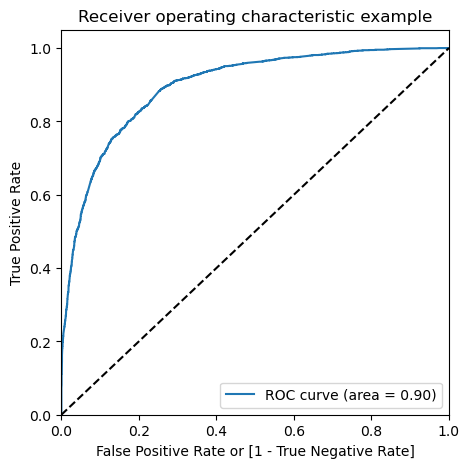

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.9 indicating a good predictive model.

## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [130]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.887147,7962,1,1,1,1,1,1,1,1,1,1,0
5520,0,0.109729,5520,0,1,1,0,0,0,0,0,0,0,0
1962,0,0.099380,1962,0,1,0,0,0,0,0,0,0,0,0
1566,1,0.974154,1566,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.291556,9170,0,1,1,1,0,0,0,0,0,0,0


In [131]:
# Now calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.641557  0.971062  0.439919
0.2   0.2  0.766792  0.918975  0.673666
0.3   0.3  0.802731  0.854899  0.770807
0.4   0.4  0.819209  0.780074  0.843157
0.5   0.5  0.821877  0.711451  0.889451
0.6   0.6  0.817483  0.648202  0.921073
0.7   0.7  0.795198  0.542373  0.949911
0.8   0.8  0.766008  0.430343  0.971414
0.9   0.9  0.721124  0.286482  0.987098


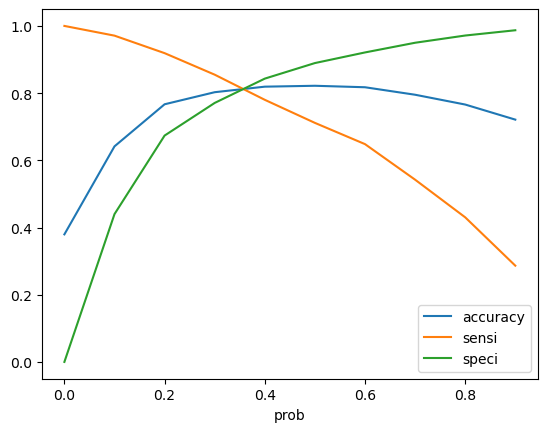

In [132]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [133]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
7962,0,0.887147,7962,1,1,1,1,1,1,1,1,1,1,0,1
5520,0,0.109729,5520,0,1,1,0,0,0,0,0,0,0,0,0
1962,0,0.099380,1962,0,1,0,0,0,0,0,0,0,0,0,0
1566,1,0.974154,1566,1,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.291556,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [134]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
7962,0,0.887147,7962,1,89
5520,0,0.109729,5520,0,11
1962,0,0.099380,1962,0,10
1566,1,0.974154,1566,1,97
9170,0,0.291556,9170,0,29


In [135]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2068
0     351
Name: final_Predicted, dtype: int64

In [136]:
# check the precentage of final_predicted conversions

2068/float(2068+351)

0.8548987184787102

### Hence, we can see that the final prediction of conversions have a target of 85% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [137]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8027306967984934

In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3047,  906],
       [ 351, 2068]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8548987184787102

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.7708069820389577

### Inference:
We can see above the model seems to be performing well. The ROC curve has a value of 0.9, which is very good. We have the following values for the Train Data:

- Accuracy : 80.27%
- Sensitivity :85.48%
- Specificity : 77.08%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [142]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.22919301796104224


In [143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.695359784801614


In [144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8967039434961742


### Precision and Recall

In [145]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3047,  906],
       [ 351, 2068]], dtype=int64)

In [146]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.695359784801614

In [147]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8548987184787102

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.695359784801614

In [150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8548987184787102

### Precision and Recall Trade-off

In [151]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [152]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

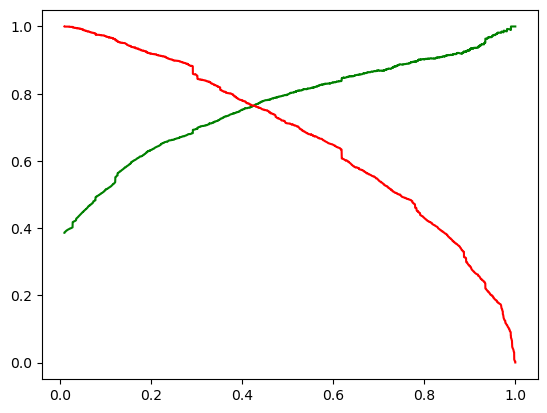

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on the test set

In [154]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3504,0.3,0.186620,0.500000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4050,0.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7201,0.2,0.313380,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0.4,0.186180,0.666667,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8219,0.7,0.108715,0.291667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Specialization_E-Business,Specialization_Hospitality Management,Specialization_Others,Specialization_Services Excellence
3504,0.3,0.186620,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,0.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7201,0.2,0.313380,0.333333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1196,0.4,0.186180,0.666667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8219,0.7,0.108715,0.291667,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
X_test_sm.shape

(2731, 37)

In [158]:
y_test_pred = res.predict(X_test_sm) 

In [159]:
y_test_pred[:10]

3504    0.211701
4050    0.968689
7201    0.323974
1196    0.201261
8219    0.182200
8747    0.121054
9048    0.220037
6524    0.061360
7693    0.135567
8187    0.934135
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
y_pred_1.head()

,0
3504,0.211701
4050,0.968689
7201,0.323974
1196,0.201261
8219,0.182200


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [164]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [166]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.211701
1,1,4050,0.968689
2,0,7201,0.323974
3,0,1196,0.201261
4,1,8219,0.182200


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [168]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.211701
1,1,4050,0.968689
2,0,7201,0.323974
3,0,1196,0.201261
4,1,8219,0.182200


### Assigning Lead Score

In [169]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.211701,21
1,4050,1,0.968689,97
2,7201,0,0.323974,32
3,1196,0,0.201261,20
4,8219,1,0.182200,18


In [171]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [172]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.211701,21,0
1,4050,1,0.968689,97,1
2,7201,0,0.323974,32,1
3,1196,0,0.201261,20,0
4,8219,1,0.182200,18,0


In [173]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    896
0    146
Name: final_Predicted, dtype: int64

In [174]:
# check the precentage of final_predicted conversions on test data

896/float(896+146)

0.8598848368522073

### Hence we can see that the final prediction of conversions have a target rate of 85% (same as predictions made on training data set)

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8106920541926035

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1318,  371],
       [ 146,  896]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8598848368522073

In [179]:
# Let us calculate specificity
TN / float(TN+FP)

0.7803433984606276

#### Precision and Recall metrics for the test set

In [180]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7071823204419889

In [181]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8598848368522073

Inference:
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 85.98%
- Sensitivity :85.98%
- Specificity : 78.03%

## Conclusion:
- We have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 85%, 85% and 78% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.

### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- Total Time Spent on Website